In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

* 'mpimg' is used to convert .jpg .png files ---> numpy array

In [ ]:
image_as_array=mpimg.imread('palm_trees.jpg')

In [5]:
image_as_array

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

In [8]:
np.shape(image_as_array) #(Height,width,color) and each row represents 1 pixel (red,green,blue) values

(1401, 934, 3)

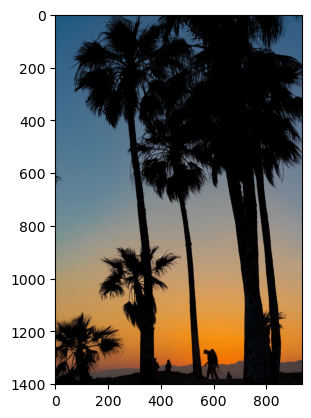

In [9]:
plt.imshow(image_as_array)

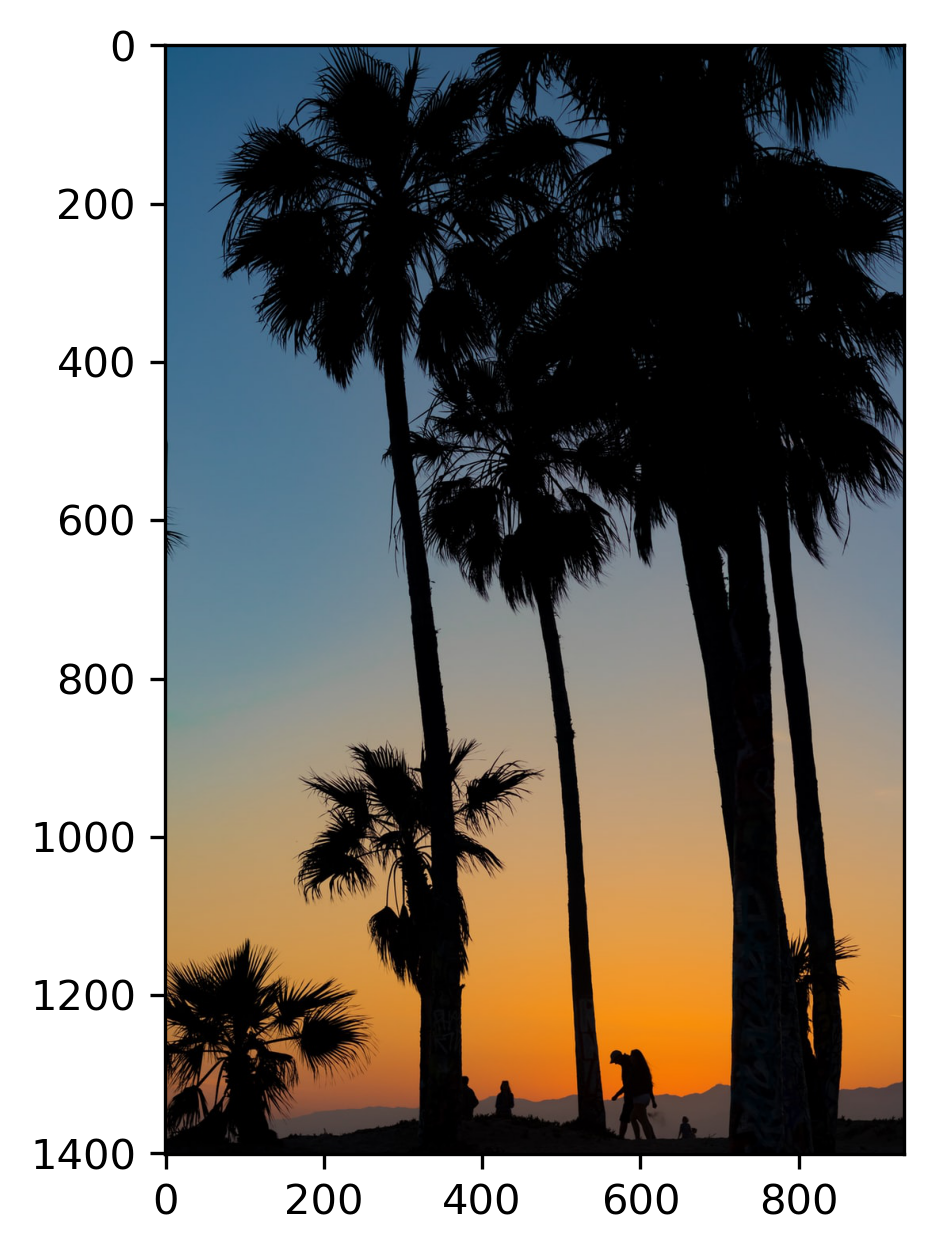

In [10]:
plt.figure(dpi=300)
plt.imshow(image_as_array)

# using KMeans to quantize colors --> reduce colors

In [12]:
#convert 3D array to 2D array i,e (H,W,C)--> 2D (H*W,C)
(h,w,c)=image_as_array.shape

In [13]:
h

1401

In [14]:
image_as_array2d=image_as_array.reshape(h*w,c)

In [15]:
image_as_array2d

array([[ 25,  89, 127],
       [ 25,  89, 127],
       [ 25,  89, 127],
       ...,
       [  9,   9,  11],
       [ 10,  10,  12],
       [ 10,  10,  12]], dtype=uint8)

In [17]:
image_as_array2d.shape

(1308534, 3)

In [19]:
from sklearn.cluster import KMeans

In [21]:
model=KMeans(n_clusters=6,n_init='auto')

In [22]:
labels=model.fit_predict(image_as_array2d)

In [23]:
labels

array([3, 3, 3, ..., 1, 1, 1])

In [24]:
model.cluster_centers_

array([[136.53353301, 143.67262809, 144.02024145],
       [  2.75681831,   2.57563804,   3.70063119],
       [219.03844726, 135.52753177,  47.16770077],
       [ 71.01402807, 109.19882486, 137.65077586],
       [ 67.28093254,  61.53931373,  61.98303392],
       [191.28393095, 154.513778  , 109.80730469]])

In [25]:
rgb_codes=model.cluster_centers_.round(0).astype(int)

In [26]:
rgb_codes # 6 centers as 'n_clusters=6'

array([[137, 144, 144],
       [  3,   3,   4],
       [219, 136,  47],
       [ 71, 109, 138],
       [ 67,  62,  62],
       [191, 155, 110]])

* we know labels are associated with rgb_codes

In [28]:
rgb_codes[labels] # labels are index positions that are passed into rgb_codes to get center value

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

In [30]:
quantized_img3d=np.reshape(rgb_codes[labels],(h,w,c))

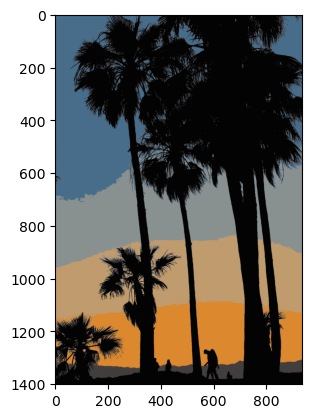

In [31]:
plt.imshow(quantized_img3d)

* as 'n_clusters=6' we can see 6 colors in the image

In [33]:
len(labels) # total no. of data points

1308534